In [1]:
import datetime
import numpy as np
from matplotlib import cm, pyplot as plt
import pandas as pd
from pandas_datareader import data
import keras
import ta

Using TensorFlow backend.


In [2]:
#X = data.DataReader("^DJI",start='2010-1-1',end='2020-7-30',data_source='yahoo')

In [3]:
#X.to_csv('DJI.csv')

In [4]:
df=pd.read_csv('DJI.csv')
len(df)

2663

In [5]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [6]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,10555.009766,10423.129883,10548.509766,10428.049805,137940000,10428.049805
1,2010-01-04,10604.969727,10430.690430,10430.690430,10583.959961,179780000,10583.959961
2,2010-01-05,10584.559570,10522.519531,10584.559570,10572.019531,188540000,10572.019531
3,2010-01-06,10594.990234,10546.549805,10564.719727,10573.679688,186040000,10573.679688
4,2010-01-07,10612.370117,10505.209961,10571.110352,10606.860352,217390000,10606.860352


In [7]:
df["ho"]=(((df.High-df.Open)/df.Open)*100)
df["lo"]=(((df.Open-df.Low)/df.Open)*100)
df["co"]=(((df.Open-df.Close)/df.Open)*100)
df["hl"]=(((df.High-df.Low)/df.Low)*100)

In [8]:
df['Open1']=(((df.Open.shift(-1)-df.Open)/df.Open)*100)

In [9]:
df['Open2']=(((df.Open-df.Open.shift(1))/df.Open.shift(1))*100)

In [10]:
df['label']=np.where(df['Close'].shift(-1)>df['Close'],1,0)

In [11]:
df['rsi']=ta.momentum.rsi(df["Close"], n=14, fillna=False)
df['r']=ta.momentum.wr(df["High"], df["Low"], df["Close"], lbp=14, fillna=False)
df['cci']=ta.trend.cci(df["High"], df["Low"], df["Close"], n=20, c=0.015, fillna=False) 

In [12]:
df['rsitf']=np.where(df['rsi']>=70,2,(np.where(df['rsi']<=30,1,0)))
df['rtf']=np.where(df['r']>=-20,2,(np.where(df['r']<=-80,1,0)))
df['ccitf']=np.where(df['cci']<=-100,2,(np.where(df['cci']>=100,1,0)))

In [13]:
len(df)

2663

In [14]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,ho,lo,co,hl,Open1,Open2,label,rsi,r,cci,rsitf,rtf,ccitf
0,2009-12-31,10555.009766,10423.129883,10548.509766,10428.049805,137940000,10428.049805,0.061620,1.188603,1.141962,1.265262,-1.116929,NaN,1,100.000000,-96.269392,NaN,2,1,0
1,2010-01-04,10604.969727,10430.690430,10430.690430,10583.959961,179780000,10583.959961,1.670832,0.000000,-1.469409,1.670832,1.475158,-1.116929,0,100.000000,-11.553995,66.666667,2,2,0
2,2010-01-05,10584.559570,10522.519531,10584.559570,10572.019531,188540000,10572.019531,0.000000,0.586137,0.118475,0.589593,-0.187441,1.475158,1,92.380758,-18.120449,68.344739,2,2,0
3,2010-01-06,10594.990234,10546.549805,10564.719727,10573.679688,186040000,10573.679688,0.286524,0.171987,-0.084810,0.459301,0.060490,-0.187441,1,92.466701,-17.207471,73.886101,2,2,0
4,2010-01-07,10612.370117,10505.209961,10571.110352,10606.860352,217390000,10606.860352,0.390307,0.623401,-0.338186,1.020067,0.333835,0.060490,1,93.938367,-2.911519,68.620287,2,2,0
5,2010-01-08,10619.400391,10554.330078,10606.400391,10618.190430,172710000,10618.190430,0.122568,0.490933,-0.111160,0.616527,0.131139,0.333835,1,94.344639,-0.616476,94.875284,2,2,0
6,2010-01-11,10676.230469,10591.589844,10620.309570,10663.990234,182050000,10663.990234,0.526547,0.270423,-0.411294,0.799131,0.400655,0.131139,0,95.622011,-4.836115,144.547664,2,2,1
7,2010-01-12,10663.080078,10568.839844,10662.860352,10627.259766,256050000,10627.259766,0.002061,0.881757,0.333875,0.891680,-0.326090,0.400655,1,80.013309,-19.348317,86.108167,2,2,0
8,2010-01-13,10709.259766,10614.490234,10628.089844,10680.769531,202810000,10680.769531,0.763730,0.127959,-0.495665,0.892832,0.489931,-0.326090,1,84.088226,-9.957099,129.243992,2,2,1
9,2010-01-14,10723.769531,10666.860352,10680.160156,10710.549805,201320000,10710.549805,0.408321,0.124528,-0.284543,0.533514,0.251214,0.489931,0,85.820864,-4.397200,137.242302,2,2,1


In [15]:
df=df.dropna()

In [16]:
len(df)

2661

In [17]:
test=int(len(df)*0.20)
print(test)

532


In [18]:
X = np.column_stack((df.ho,df.lo,df.co,df.hl, df.Open1,df.Open2))

In [19]:
X.shape

(2661, 6)

In [20]:
#https://analyticsindiamag.com/hands-on-guide-to-lstm-recurrent-neural-network-for-stock-market-prediction/

In [21]:
b=15

In [22]:
t=[]
for i in range(b,len(X)):
    t.append(X[i-b:i].reshape(b,6,1))

In [23]:
inputF=np.asarray(t)

In [24]:
inputF.shape

(2646, 15, 6, 1)

In [25]:
inputF = array(inputF).reshape(len(inputF), b, 6)
print(inputF)

[[[ 1.67083184  0.         -1.46940926  1.67083184  1.47515777
   -1.11692873]
  [ 0.          0.58613718  0.11847483  0.589593   -0.18744137
    1.47515777]
  [ 0.28652448  0.17198679 -0.08481021  0.4593012   0.06049025
   -0.18744137]
  ...
  [ 0.10402081  2.16165285  2.01840897  2.31573175 -2.02123627
   -1.08007105]
  [ 0.          2.23243315  2.08477732  2.28340872 -2.06438053
   -2.02123627]
  [ 0.80363349  0.03272772 -0.21386269  0.83663502  0.19901525
   -2.06438053]]

 [[ 0.          0.58613718  0.11847483  0.589593   -0.18744137
    1.47515777]
  [ 0.28652448  0.17198679 -0.08481021  0.4593012   0.06049025
   -0.18744137]
  [ 0.39030683  0.62340084 -0.33818586  1.02006677  0.33383474
    0.06049025]
  ...
  [ 0.          2.23243315  2.08477732  2.28340872 -2.06438053
   -2.02123627]
  [ 0.80363349  0.03272772 -0.21386269  0.83663502  0.19901525
   -2.06438053]
  [ 0.88060024  0.38988364  0.01039268  1.27545668 -0.01039268
    0.19901525]]

 [[ 0.28652448  0.17198679 -0.084810

In [26]:
inputF.shape

(2646, 15, 6)

In [27]:
Y=df[['label']][b:]

In [28]:
#Y = np.array(df.label)

In [29]:
Y.shape

(2646, 1)

In [30]:
from keras.utils import to_categorical#one-hot encode target column
output = to_categorical(Y)
output[0]

array([0., 1.], dtype=float32)

In [31]:
output.shape

(2646, 2)

In [32]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(b, 6)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15, 200)           165600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 100)           120400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 15, 50)            30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

In [33]:
from keras.callbacks import ModelCheckpoint
# checkpoint
filepath="models/model{epoch:02d}"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [34]:
#train the model
history=model.fit(inputF[:-test], output[:-test],  epochs=100,validation_data=(inputF[-test:], output[-test:]),
                  shuffle=False,batch_size=32, callbacks=callbacks_list, verbose=1)

Train on 2114 samples, validate on 532 samples
Epoch 1/100
2114/2114 [==============================] - 11s 5ms/step - loss: 8.5965 - accuracy: 0.5388 - val_loss: 8.7184 - val_accuracy: 0.5508

Epoch 00001: val_accuracy improved from -inf to 0.55075, saving model to models/model01
Epoch 2/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7241 - accuracy: 0.4806 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00002: val_accuracy did not improve from 0.55075
Epoch 3/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00003: val_accuracy did not improve from 0.55075
Epoch 4/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00004: val_accuracy did not improve from 0.55075
Epoch 5/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 

2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00041: val_accuracy did not improve from 0.55075
Epoch 42/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00042: val_accuracy did not improve from 0.55075
Epoch 43/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00043: val_accuracy did not improve from 0.55075
Epoch 44/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00044: val_accuracy did not improve from 0.55075
Epoch 45/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00045: val_accuracy did not improve from 0.55075
Epo


Epoch 00081: val_accuracy did not improve from 0.55075
Epoch 82/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00082: val_accuracy did not improve from 0.55075
Epoch 83/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00083: val_accuracy did not improve from 0.55075
Epoch 84/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00084: val_accuracy did not improve from 0.55075
Epoch 85/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accuracy: 0.4492

Epoch 00085: val_accuracy did not improve from 0.55075
Epoch 86/100
2114/2114 [==============================] - 6s 3ms/step - loss: 8.7376 - accuracy: 0.4579 - val_loss: 8.8771 - val_accurac

In [35]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

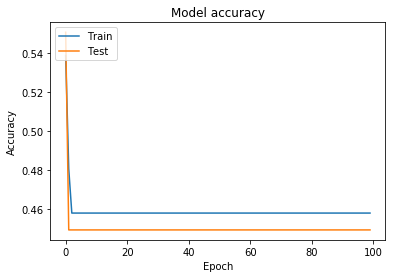

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

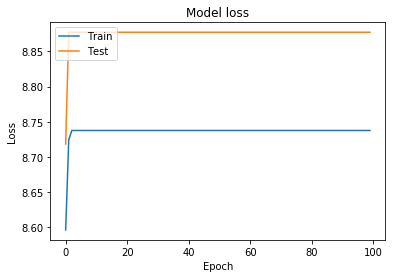

In [37]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [38]:
from keras.models import load_model
model = load_model("models/model95")

In [39]:
Y_pred=model.predict(inputF[-test:])
y_pred = np.argmax(Y_pred, axis=1)

In [40]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [41]:
len(y_pred)

532

In [42]:
actual=np.argmax(output[-test:], axis=1) 

In [43]:
actual

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print('Classification Report')
target_names = ['Actual', 'Prediction']

print(classification_report(actual, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.53      0.28      0.37       239
           1       0.58      0.79      0.67       293

   micro avg       0.56      0.56      0.56       532
   macro avg       0.55      0.54      0.52       532
weighted avg       0.55      0.56      0.53       532



In [46]:
df['y_pred']=5
df['y_pred'][-test:]=y_pred
df.to_csv("afterDJIA.csv")



/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/jagdish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/jagdish/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._set_wi